In [1]:
# -------------------------------------------------------------------------------
# import packages
import import_ipynb
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------------------------
# import scripts
from data_processing import hiring_data
import functions.algorithmic_model as am
import functions.simulation_vis as sm_vis
import functions.qualification as qual_plot

<string>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [2]:
# data to X and y
X = hiring_data.drop(columns=['decision', 'Id', 'sport'])
y = hiring_data['decision']

beta = [0, 0.2, 0.6]

# Logistic Model - No Group Fairness

In [3]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_1 = []
labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_1 = []
qual_female_first_stage_df_lm_1 = []

qual_male_second_stage_df_lm_1 = []
qual_female_second_stage_df_lm_1 = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_lm_1, gender_shares2, 
     qual_male_first_stage, qual_female_first_stage, 
     qual_male_second_stage, qual_female_second_stage) = am.logistic_regression(X, y, "logistic", discrimination, enforce_fairness=False)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_1.append(all_selected_lm_1)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_1.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_1.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_1.append(flat_qualification_male)
    qual_female_second_stage_df_lm_1.append(flat_qualification_female)


------------------------------
Mean: 0.3838369592042081
Mean: 0.348
------------------------------
Mean Male Qualification: 62.306280454517434
Mean Female Qualification: 66.6653500257912
------------------------------
Mean: 0.3838369592042081
Mean: 0.4308
------------------------------
Mean Male Qualification: 62.306280454517434
Mean Female Qualification: 66.6653500257912
------------------------------
Mean: 0.3838369592042081
Mean: 0.544
------------------------------
Mean Male Qualification: 62.306280454517434
Mean Female Qualification: 66.6653500257912


In [4]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_1):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)


   beta_index  male_mean_qual  female_mean_qual
0           0       62.763205         67.083436
1           1       62.802209         67.110330
2           2       62.810104         67.094737


DataFrame contains 3985 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std
Stage                                 Gender                 
Algorithmic Stage                     Female  66.6654  1.8836
                                      Male    62.3063  1.1322
Human Decision\n(Discrimination)      Female  67.1548  3.2883
                                      Male    62.8058  1.8001
Human Decision\n(High Discrimination) Female  67.1413  3.5294
                                      Male    62.8096  1.7697
Human Decision\n(No Discrimination)   Female  67.1265  3.0315
                                      Male    62.7660  1.8215


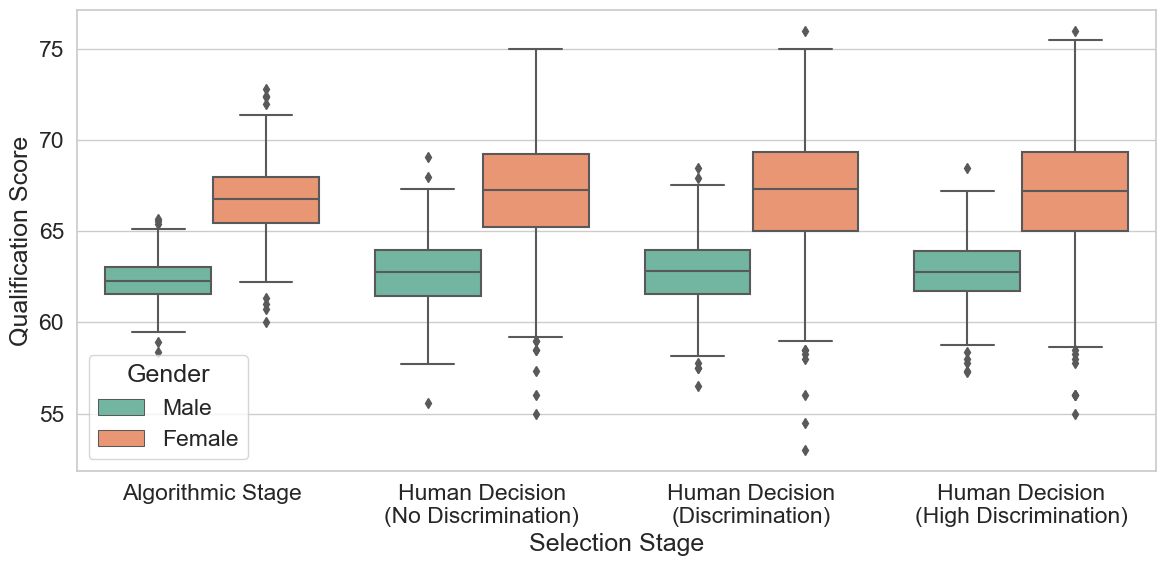

             Score
count  3985.000000
mean     64.838322
std       3.257644
min      53.000000
25%      62.357143
50%      64.250000
75%      67.000000
max      76.000000


In [5]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Random Forest Model - No Group Fairness

In [6]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_1 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_1 = []
qual_female_first_stage_df_rf_1 = []

qual_male_second_stage_df_rf_1 = []
qual_female_second_stage_df_rf_1 = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_rf_1, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage) = am.random_forest_model(X,y, "random_forest", discrimination, enforce_fairness=False)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)
    
    # get all_selected for each into results
    results_rf_1.append(all_selected_rf_1)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_1.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_1.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_1.append(flat_qualification_male)
    qual_female_second_stage_df_rf_1.append(flat_qualification_female)

------------------------------
Mean: 0.2872685697306683
Mean: 0.281
------------------------------
Mean Male Qualification: 61.71272030958944
Mean Female Qualification: 65.87661043015972
------------------------------
Mean: 0.2872685697306683
Mean: 0.3486
------------------------------
Mean Male Qualification: 61.71272030958944
Mean Female Qualification: 65.87661043015972
------------------------------
Mean: 0.2872685697306683
Mean: 0.4612
------------------------------
Mean Male Qualification: 61.71272030958944
Mean Female Qualification: 65.87661043015972


In [7]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_1):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0       62.130679         66.173853
1           1       62.193534         66.136015
2           2       62.221872         65.923534


# Logistic Model - Statistical Parity

In [8]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_2 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_2 = []
qual_female_first_stage_df_lm_2 = []

qual_male_second_stage_df_lm_2 = []
qual_female_second_stage_df_lm_2 = []

for discrimination in beta: 
    (X_train, y_train, model, gender_shares1, all_selected_lm_2, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage)  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="demographic_parity")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_2.append(all_selected_lm_2)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_2.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_2.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_2.append(flat_qualification_male)
    qual_female_second_stage_df_lm_2.append(flat_qualification_female)

------------------------------
Mean: 0.04345114648248661
Mean: -0.025800000000000003
------------------------------
Mean Male Qualification: 62.17265924850387
Mean Female Qualification: 66.62234704291595
------------------------------
Mean: 0.04225463691346261
Mean: 0.0718
------------------------------
Mean Male Qualification: 62.162557377786236
Mean Female Qualification: 66.62506610220892
------------------------------
Mean: 0.0415712637641196
Mean: 0.2126
------------------------------
Mean Male Qualification: 62.18796716733965
Mean Female Qualification: 66.62328979344028


In [9]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_2):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.636480          0.701250
1           1        0.635111          0.701594
2           2        0.634999          0.702026


# Random Forest Model - Statistical Parity

In [10]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_2 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_2 = []
qual_female_first_stage_df_rf_2 = []

qual_male_second_stage_df_rf_2 = []
qual_female_second_stage_df_rf_2 = []

for discrimination in beta: 
    (X_train, y_train, model, gender_shares1, all_selected_rf_2, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage)  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="demographic_parity")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_2.append(all_selected_rf_2)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_2.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_2.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_2.append(flat_qualification_male)
    qual_female_second_stage_df_rf_2.append(flat_qualification_female)

------------------------------
Mean: -0.03253470576751085
Mean: -0.0336
------------------------------
Mean Male Qualification: 62.22956686505685
Mean Female Qualification: 65.1694906777277
------------------------------
Mean: -0.03254326315863724
Mean: 0.0718
------------------------------
Mean Male Qualification: 62.230837642977235
Mean Female Qualification: 65.17981374324832
------------------------------
Mean: -0.030844839002725246
Mean: 0.212
------------------------------
Mean Male Qualification: 62.23241933312108
Mean Female Qualification: 65.18259700158907


In [11]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_2):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.653349          0.650331
1           1        0.652440          0.650661
2           2        0.650693          0.648933


# Logistic Model - Equalized Odds

In [12]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_3 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_3 = []
qual_female_first_stage_df_lm_3 = []

qual_male_second_stage_df_lm_3 = []
qual_female_second_stage_df_lm_3 = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_lm_3, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage)  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="equalized_odds")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)
    
    # get all_selected for each into results
    results_lm_3.append(all_selected_lm_3)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_3.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_3.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_3.append(flat_qualification_male)
    qual_female_second_stage_df_lm_3.append(flat_qualification_female)

------------------------------
Mean: 0.08082359492337908
Mean: 0.0158
------------------------------
Mean Male Qualification: 62.467466017763364
Mean Female Qualification: 66.71800522171327
------------------------------
Mean: 0.07863321154115309
Mean: 0.11560000000000001
------------------------------
Mean Male Qualification: 62.46695691019566
Mean Female Qualification: 66.66170176785793
------------------------------
Mean: 0.07727796900647675
Mean: 0.2382
------------------------------
Mean Male Qualification: 62.46915563729416
Mean Female Qualification: 66.77173672320112


In [13]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_3):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.640201          0.698118
1           1        0.638407          0.700929
2           2        0.637402          0.699961


# Random Forest Model - Equalized Odds

In [14]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_3 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_3 = []
qual_female_first_stage_df_rf_3 = []

qual_male_second_stage_df_rf_3 = []
qual_female_second_stage_df_rf_3 = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_rf_3, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage)  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="equalized_odds")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_3.append(all_selected_rf_3)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_3.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_3.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_3.append(flat_qualification_male)
    qual_female_second_stage_df_rf_3.append(flat_qualification_female)

------------------------------
Mean: 0.21849643224086773
Mean: 0.2342
------------------------------
Mean Male Qualification: 61.769181976091986
Mean Female Qualification: 65.31963841067198
------------------------------
Mean: 0.21728446487876796
Mean: 0.3262
------------------------------
Mean Male Qualification: 61.76546152045363
Mean Female Qualification: 65.32403597317507
------------------------------
Mean: 0.2161629333185928
Mean: 0.4502
------------------------------
Mean Male Qualification: 61.762270095959565
Mean Female Qualification: 65.3215827993258


In [15]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_3):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.656377          0.647571
1           1        0.655331          0.649263
2           2        0.657430          0.647355


# Logistic Model - Equal Opportunity

In [16]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_4 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_4 = []
qual_female_first_stage_df_lm_4 = []

qual_male_second_stage_df_lm_4 = []
qual_female_second_stage_df_lm_4 = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_lm_4, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage)  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="equal_opportunity")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_4.append(all_selected_lm_4)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_4.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_4.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_4.append(flat_qualification_male)
    qual_female_second_stage_df_lm_4.append(flat_qualification_female)

------------------------------
Mean: 0.1273569115580133
Mean: 0.0726
------------------------------
Mean Male Qualification: 62.02562393470029
Mean Female Qualification: 66.69460095644489
------------------------------
Mean: 0.1256682765861858
Mean: 0.1734
------------------------------
Mean Male Qualification: 62.02954899008997
Mean Female Qualification: 66.69119940963293
------------------------------
Mean: 0.12528755677829986
Mean: 0.279
------------------------------
Mean Male Qualification: 62.02989115027239
Mean Female Qualification: 66.68545844154403


In [17]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_4):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.632819          0.699042
1           1        0.635541          0.700301
2           2        0.636720          0.696674


# Random Forest Model - Equal Opportunity

In [18]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_4 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_4 = []
qual_female_first_stage_df_rf_4 = []

qual_male_second_stage_df_rf_4 = []
qual_female_second_stage_df_rf_4 = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_rf_4, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage)  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="equal_opportunity")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_4.append(all_selected_rf_4)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_4.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_4.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_4.append(flat_qualification_male)
    qual_female_second_stage_df_rf_4.append(flat_qualification_female)

------------------------------
Mean: 0.20826383467806622
Mean: 0.2226
------------------------------
Mean Male Qualification: 61.78263983310332
Mean Female Qualification: 65.35002985418342
------------------------------
Mean: 0.20727833697227752
Mean: 0.2992
------------------------------
Mean Male Qualification: 61.78227412458746
Mean Female Qualification: 65.35051528915182
------------------------------
Mean: 0.20773114545499108
Mean: 0.4288
------------------------------
Mean Male Qualification: 61.77762148804953
Mean Female Qualification: 65.3522485287393


In [19]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_4):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.658407          0.648389
1           1        0.654433          0.648668
2           2        0.654565          0.646520


# Simulation Evaluation

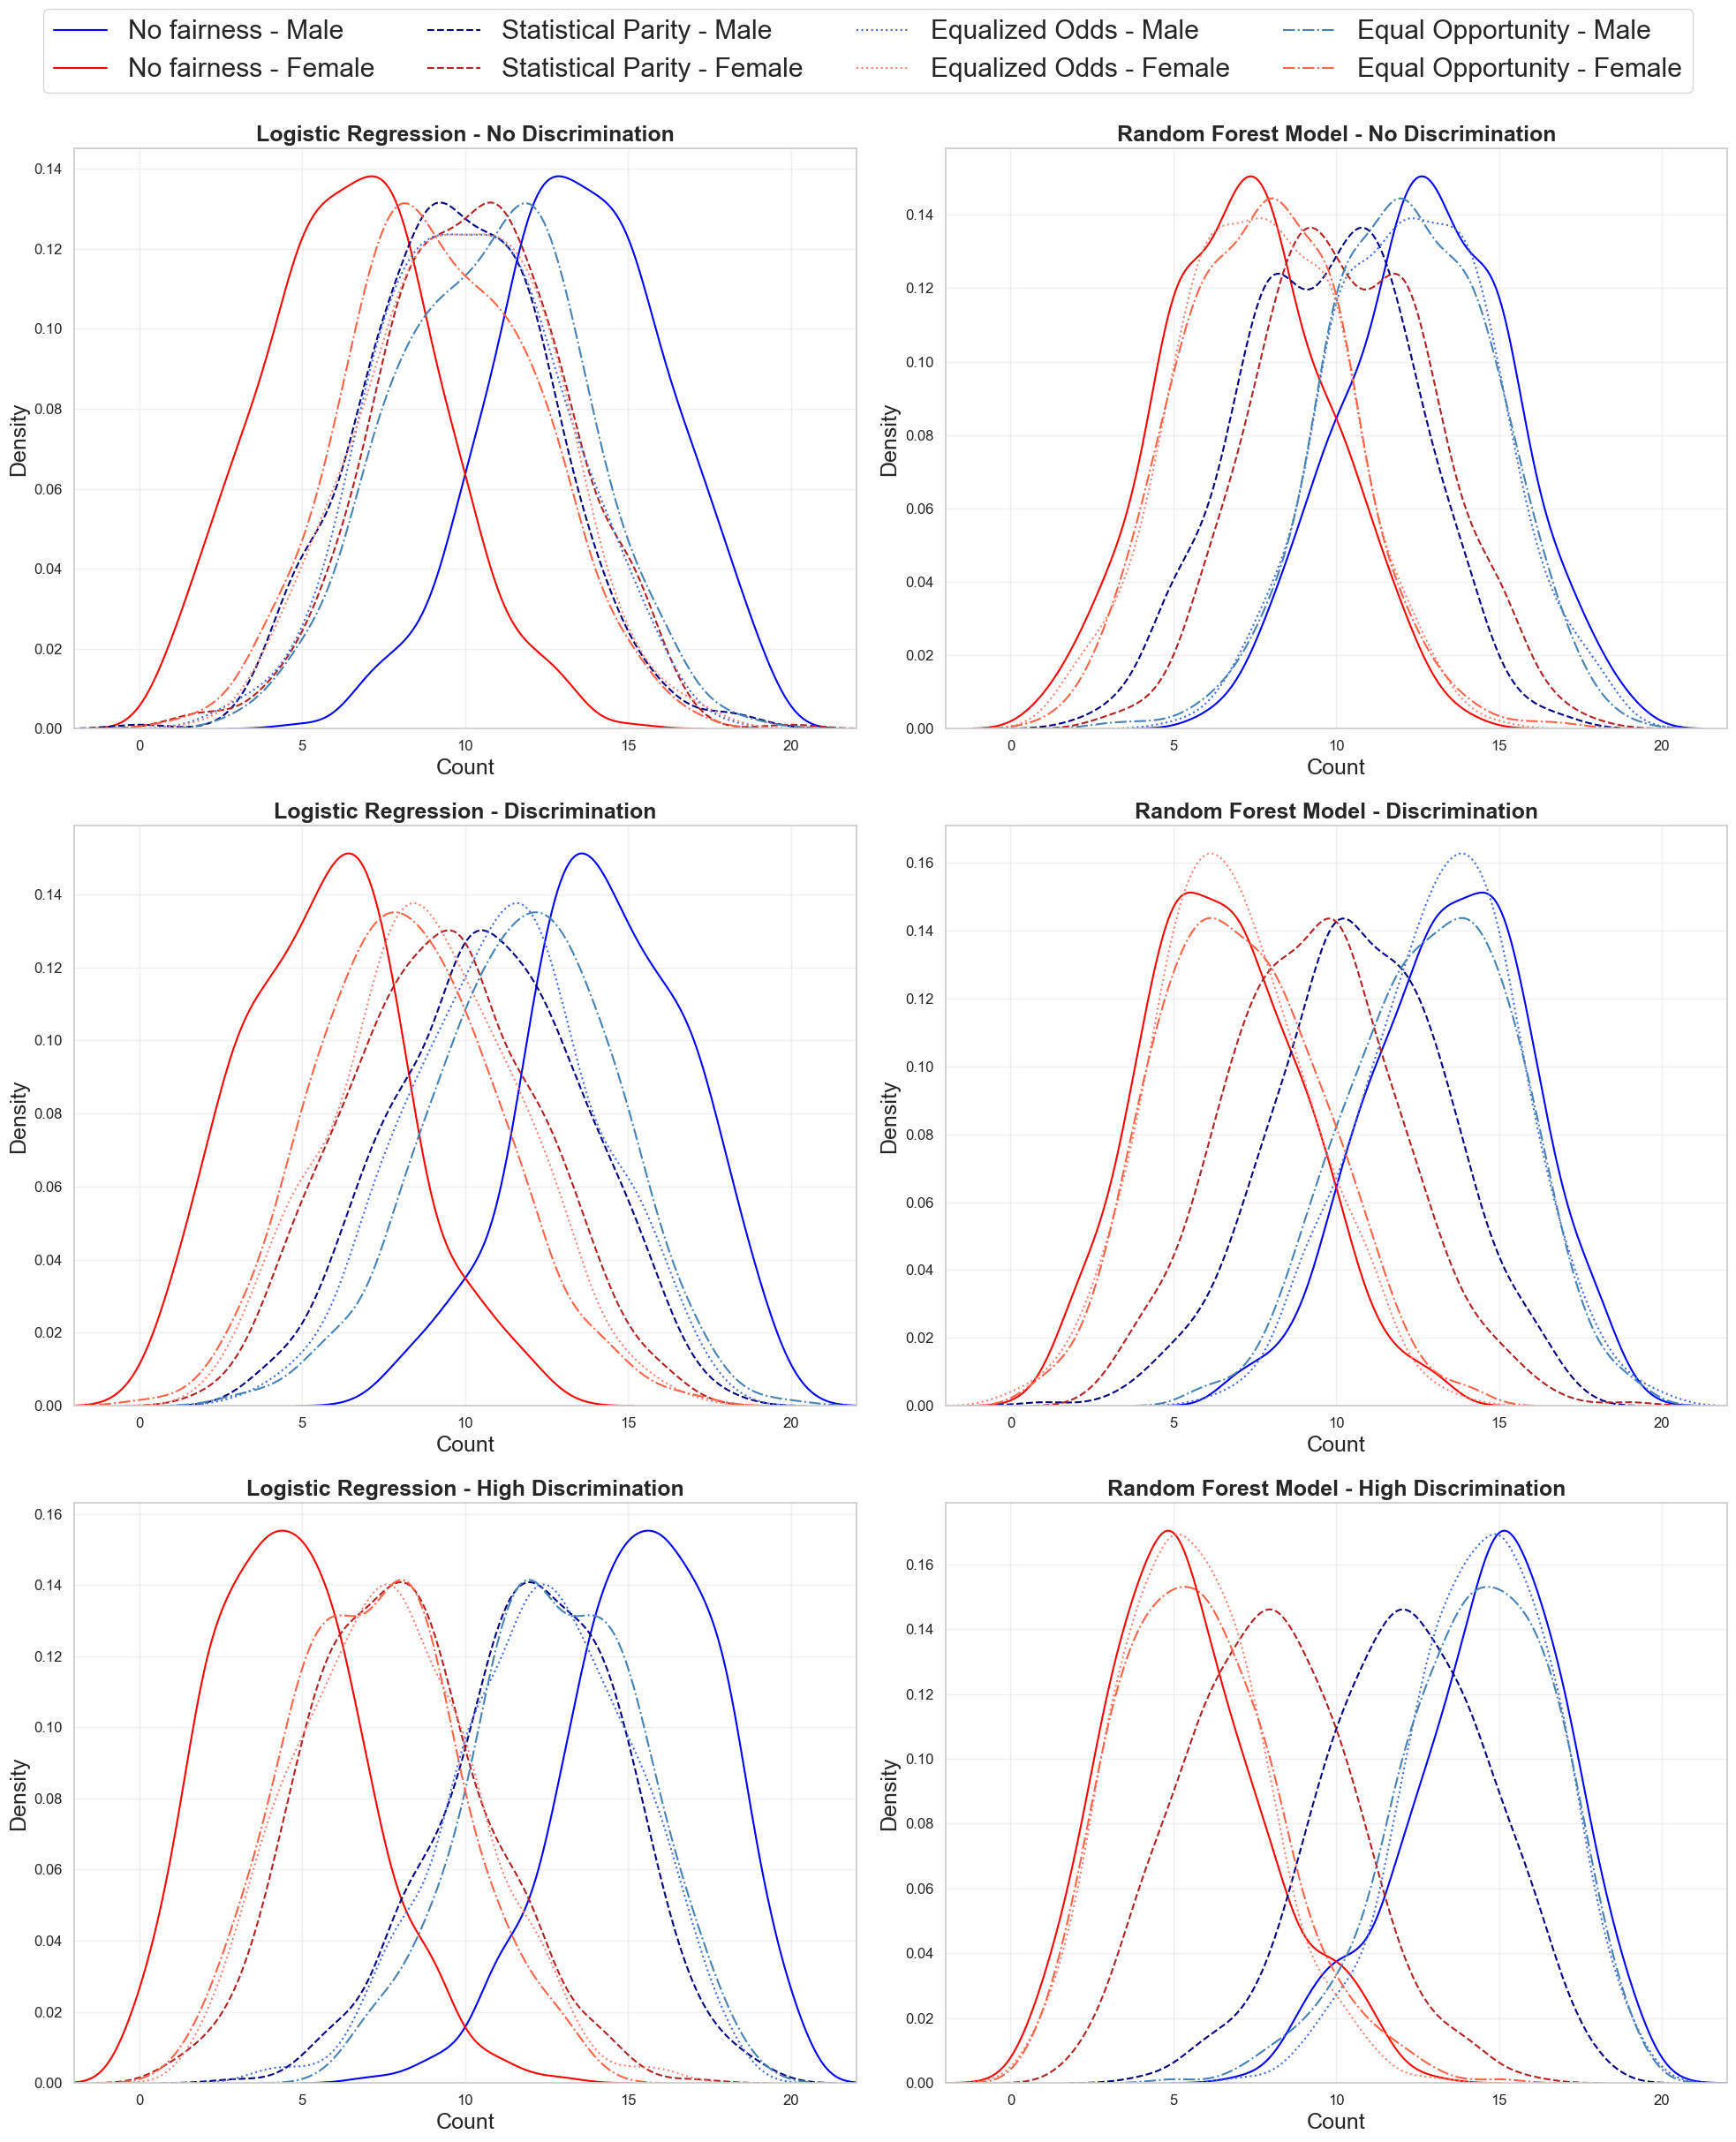

In [20]:
import matplotlib.pyplot as plt
import warnings

# Ignore specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

# Define titles
logistic_titles = [
    "Logistic Regression - No Discrimination",
    "Logistic Regression - Discrimination",
    "Logistic Regression - High Discrimination"
]

rf_titles = [
    "Random Forest Model - No Discrimination",
    "Random Forest Model - Discrimination",
    "Random Forest Model - High Discrimination"
]

# Create a 3x2 subplot figure
fig, axes = plt.subplots(3, 2, figsize=(20, 24))

# Placeholder for handles and labels
legend_handles = None
legend_labels = None

# Plot Logistic Regression results (left column)
for i, ((res1, res2, res3, res4), title) in enumerate(zip(
    zip(results_lm_1, results_lm_2, results_lm_3, results_lm_4), 
    logistic_titles
)):
    ax = axes[i, 0]
    sm_vis.plot_multiple_gender_distribution_kde_with_ax(
        res1, res2, res3, res4,
        labels=["No fairness", "Statistical Parity", "Equalized Odds", "Equal Opportunity"],
        title=title,
        ax=ax,
        show_legend=False  
    )
    if legend_handles is None:
        legend_handles, legend_labels = ax.get_legend_handles_labels()

# Plot Random Forest results (right column)
for i, ((res1, res2, res3, res4), title) in enumerate(zip(
    zip(results_rf_1, results_rf_2, results_rf_3, results_rf_4), 
    rf_titles
)):
    ax = axes[i, 1]
    sm_vis.plot_multiple_gender_distribution_kde_with_ax(
        res1, res2, res3, res4,
        labels=["No fairness", "Statistical Parity", "Equalized Odds", "Equal Opportunity"],
        title=title,
        ax=ax,
        show_legend=False
    )

# Add a single shared legend above all plots
fig.legend(
    legend_handles,
    legend_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02), 
    ncol=4,
    fontsize='large'
)

# Adjust layout to make room for the top legend
plt.tight_layout(rect=[0, 0, 1, 0.97])  

# Save and display
fig.savefig('graphics/combined_logistic_rf_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Qualification Evaluation

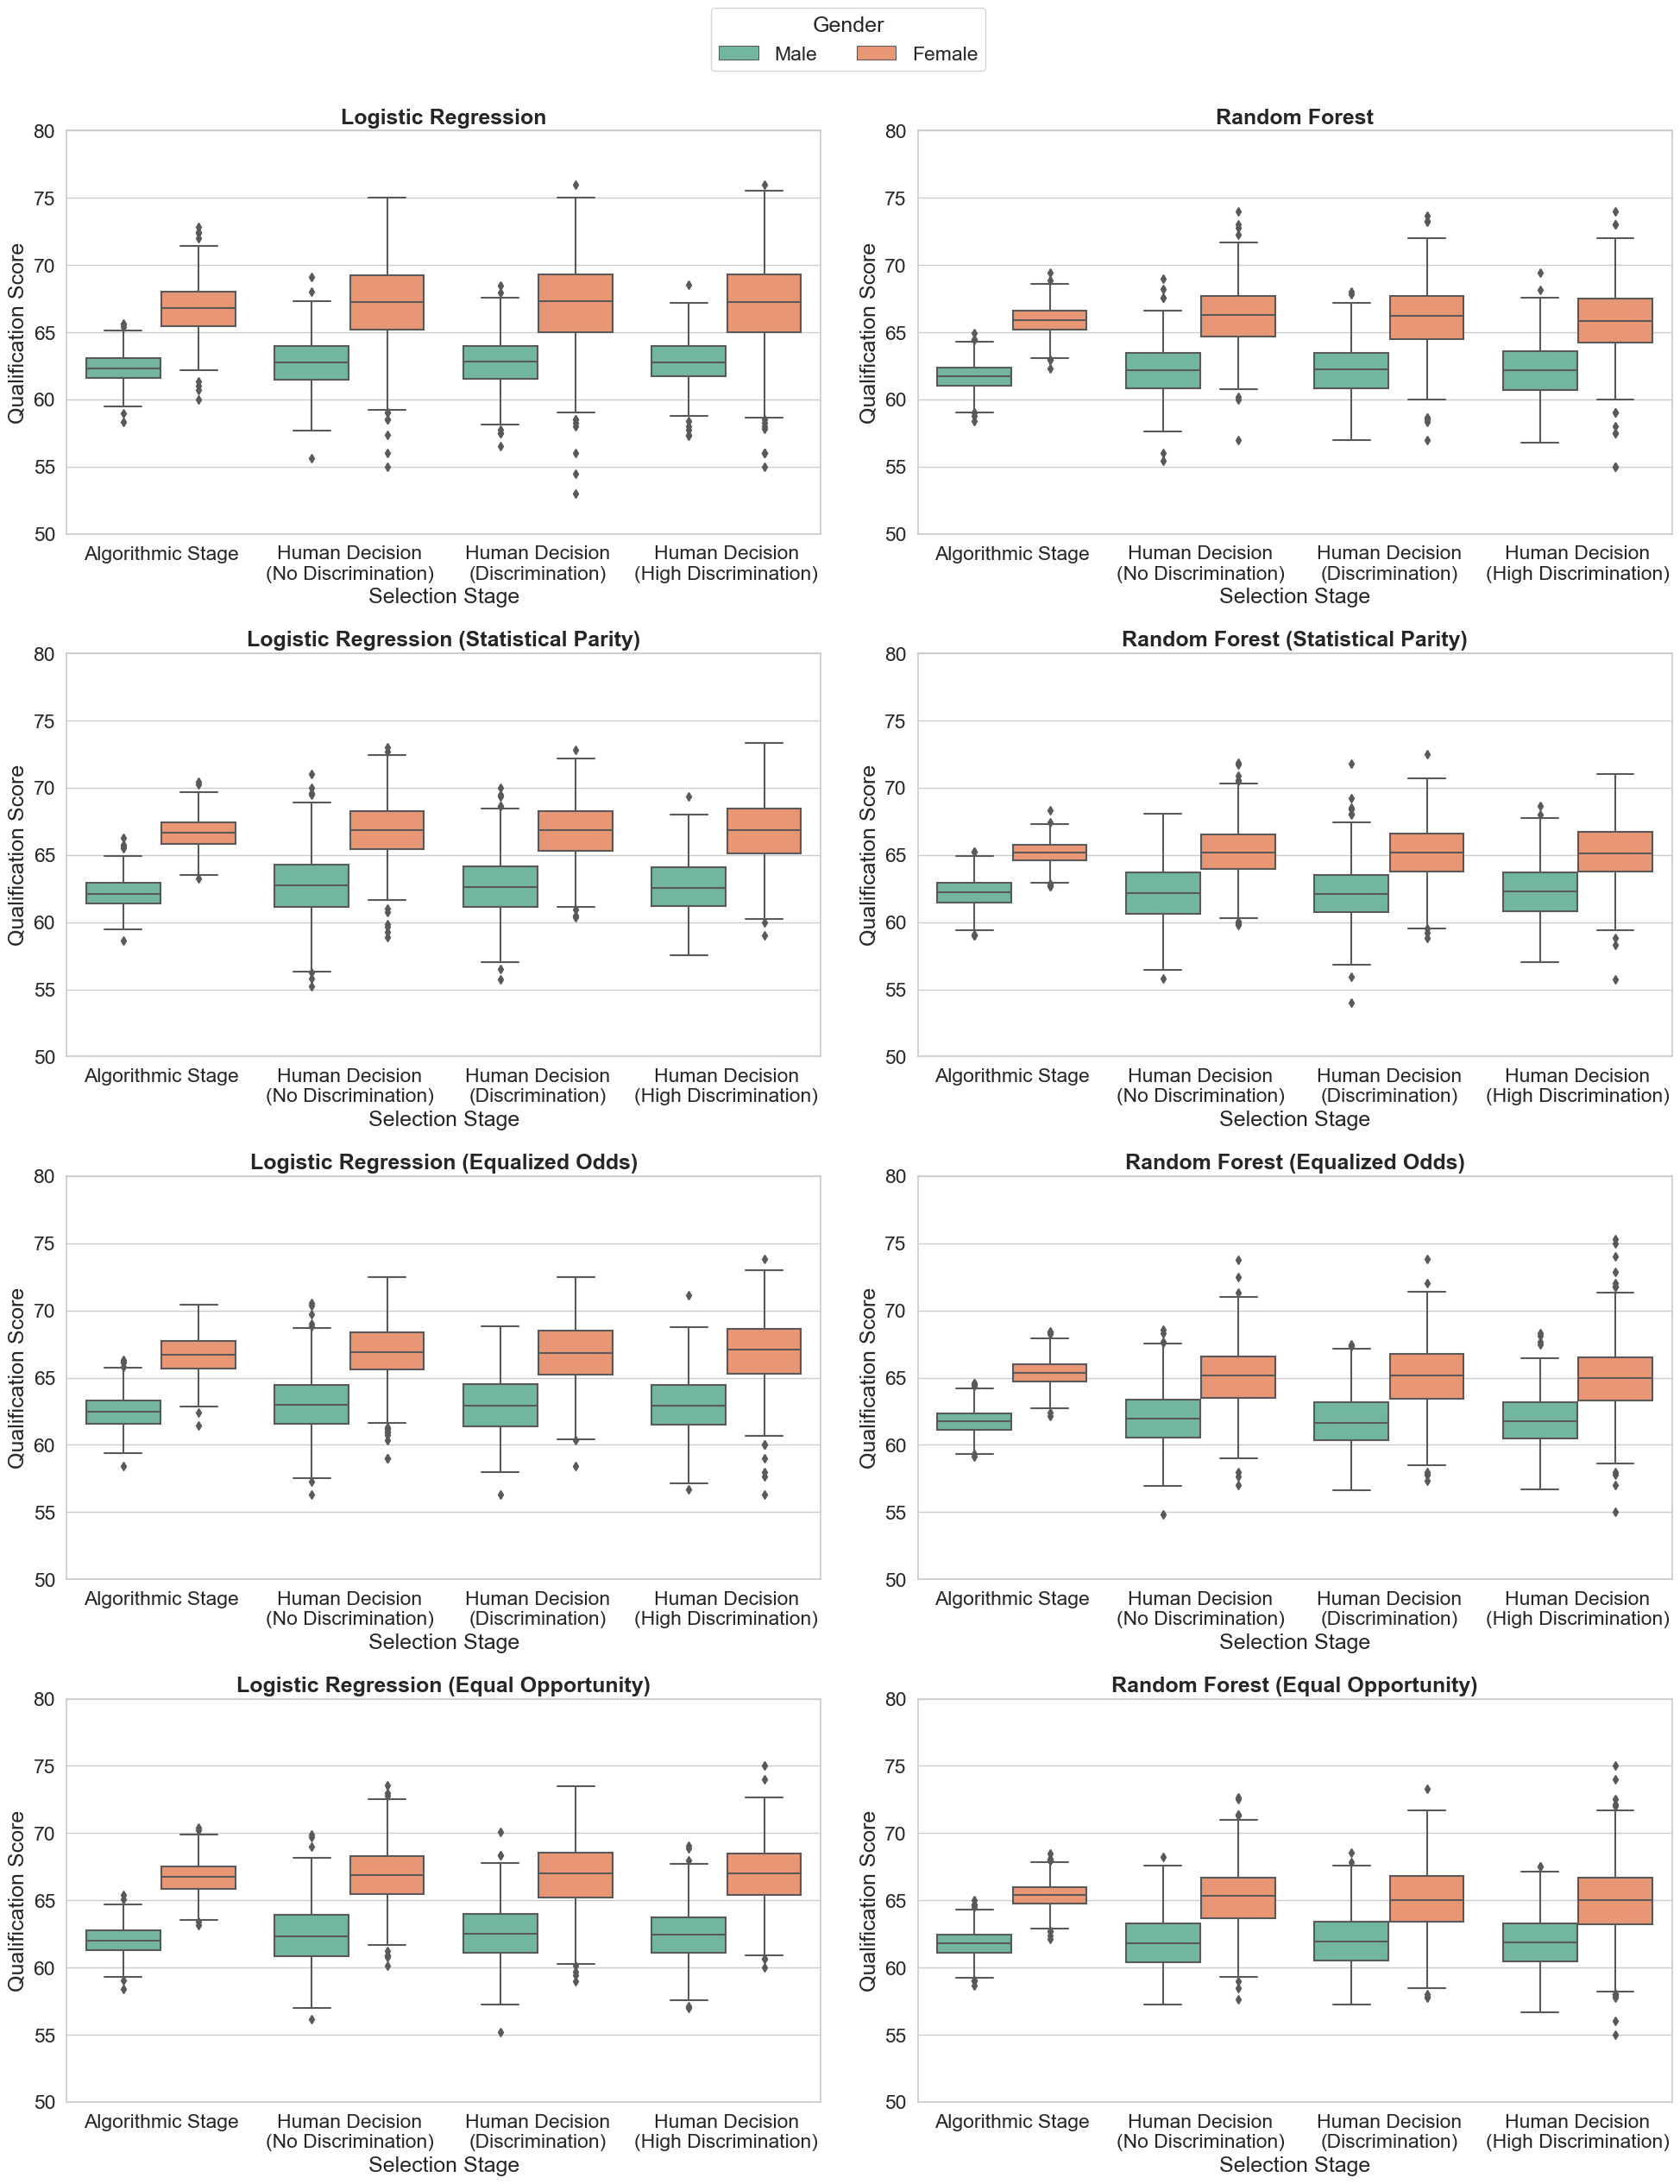

In [21]:
# Visualise Plot of Qualification
data_dict = {
    'rf_1': (
        qual_male_first_stage_df_rf_1,
        qual_female_first_stage_df_rf_1,
        qual_male_second_stage_df_rf_1,
        qual_female_second_stage_df_rf_1
    ),
    'rf_2': (
        qual_male_first_stage_df_rf_2,
        qual_female_first_stage_df_rf_2,
        qual_male_second_stage_df_rf_2,
        qual_female_second_stage_df_rf_2
    ),
    'rf_3': (
        qual_male_first_stage_df_rf_3,
        qual_female_first_stage_df_rf_3,
        qual_male_second_stage_df_rf_3,
        qual_female_second_stage_df_rf_3
    ),
    'rf_4': (
        qual_male_first_stage_df_rf_4,
        qual_female_first_stage_df_rf_4,
        qual_male_second_stage_df_rf_4,
        qual_female_second_stage_df_rf_4
    ),
    'lm_1': (
        qual_male_first_stage_df_lm_1,
        qual_female_first_stage_df_lm_1,
        qual_male_second_stage_df_lm_1,
        qual_female_second_stage_df_lm_1
    ),
    'lm_2': (
        qual_male_first_stage_df_lm_2,
        qual_female_first_stage_df_lm_2,
        qual_male_second_stage_df_lm_2,
        qual_female_second_stage_df_lm_2
    ),
    'lm_3': (
        qual_male_first_stage_df_lm_3,
        qual_female_first_stage_df_lm_3,
        qual_male_second_stage_df_lm_3,
        qual_female_second_stage_df_lm_3
    ),
    'lm_4': (
        qual_male_first_stage_df_lm_4,
        qual_female_first_stage_df_lm_4,
        qual_male_second_stage_df_lm_4,
        qual_female_second_stage_df_lm_4
    )
}

fig = qual_plot.visualize_qualification_grid(
    model_list=['lm_1', 'lm_2', 'lm_3', 'lm_4', 'rf_1', 'rf_2', 'rf_3', 'rf_4'],  
    variable_dict=data_dict,
    visualize_function=qual_plot.visualize_qualification_scores
)

plt.show()